# Exploring Data

## Common Data Problems

* Inconsistent Column Names
* Missing Data
* Outliers
* Duplicate Rows
* Untidy
* Need to process columns
* Column types can signal unexpected data values

## Visually Inspect the Data

In [1]:
import pandas as pd

# Read the file into DataFrame
df = pd.read_csv('https://assets.datacamp.com/production/repositories/666/datasets/c202eb5e7ae1ebf87036a30dcea577096f02c861/nyc_uber_2014.csv')

df.head()

,Unnamed: 0,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [2]:
df.tail()

,Unnamed: 0,Date/Time,Lat,Lon,Base
292,94,6/1/2014 6:27:00,40.7554,-73.9738,B02512
293,95,6/1/2014 6:35:00,40.7543,-73.9817,B02512
294,96,6/1/2014 6:37:00,40.7751,-73.9633,B02512
295,97,6/1/2014 6:46:00,40.6952,-74.1784,B02512
296,98,6/1/2014 6:51:00,40.7621,-73.9817,B02512


In [3]:
df.shape

(297, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
Unnamed: 0    297 non-null int64
Date/Time     297 non-null object
Lat           297 non-null float64
Lon           297 non-null float64
Base          297 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 11.7+ KB


## Exploratory Data Analysis

### Frequency Count

**Count the number of unique values in our data**

Frequency Count of unique Date/Time

In [6]:
df['Date/Time'].value_counts(dropna=False).head()

6/1/2014 0:08:00    3
5/1/2014 5:38:00    3
5/1/2014 6:07:00    3
5/1/2014 6:03:00    2
4/1/2014 6:15:00    2
Name: Date/Time, dtype: int64

#### Summary Statistics

Another type of EDA we can do is calculate summary statistics on Numeric Columns. This can help with ...
* Spot Outliers
    * Value considerably higher or lower than expected
    * Observations of interest that we should further investigate
    
**Numeric Data**

In [7]:
df.describe()

,Unnamed: 0,Lat,Lon
count,297.000000,297.000000,297.000000
mean,49.000000,40.740521,-73.986724
std,28.625612,0.058701,0.099509
min,0.000000,40.299000,-74.661000
25%,24.000000,40.723600,-74.003700
50%,49.000000,40.743000,-73.987700
75%,74.000000,40.762100,-73.972800
max,98.000000,41.016900,-73.462000


In [8]:
df['Lat'].describe()

count    297.000000
mean      40.740521
std        0.058701
min       40.299000
25%       40.723600
50%       40.743000
75%       40.762100
max       41.016900
Name: Lat, dtype: float64

## Data Visualization

* Great way to spot outliers and obvious errors
* Plan data cleaning steps

### pandas Plot Function
* **kind**
    * bar, barh, pie, scatter, kde
* **color**
    * Array of hex codes corresponding sequential to each data series / column.
* **linestyle**
    * solid, dotted, dashed (applies to line graphs only)
* **xlim, ylim**
    * Specify a tuple (lower limit, upper limit) for which the plot will be drawn
* **legend**
    * Boolean value to display or hide the legend
* **labels**
    * List corresponding to the number of columns in the DataFrame, a descriptive name can be provided here for the legend
* **title**
    * Title of the Plot

**Note: pd.DataFrame.plot() uses matplotlib.pyplot.plot(). pandas's plot is only a convenient shortcut**

In [9]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/666/datasets/b064fa9e0684a38ac15b0a19845367c29fde978d/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Histograms & Bar Plots

* Histogram for continuous data counts
* Bar plots for discrete data counts
* Allows us to look at frequencies

### Histogram

We take the DataFrame (df) and column of interest and call the ***.plot()*** method, we pass ***'hist'*** into the method to have **pandas** create a histogram. 

The x-axis shows the range of values that are counted
The y-axis shows how many observations in our data are in a particular range of values.

*Note we have to make sure that matplotlib is loaded before we can show the plot*

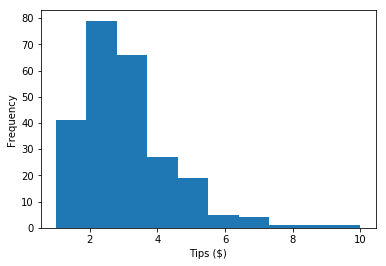

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Tips ($)')
df['tip'].plot('hist')

### Box Plots

* Visualize basic summary statistics
    * Outliers
    * Min / Max
    * 25th, 50th, 75th percentiles
    
To create a Box Plot, call the ***.boxplot()*** method on the DataFrame (df)

To plot a specific column, we pass it into the ***'column'*** parameter. We pass the ***'by'*** parameter with the name of the column we want to compare Box Plots across.

Most of the data is represented by the box. the lines that extend from the box are called *whiskers*. The ends of the *whiskers* show the **maximum** and **minimum** of our data *(Excluding Outliers, Outliers values shown beyond the whiskers)*

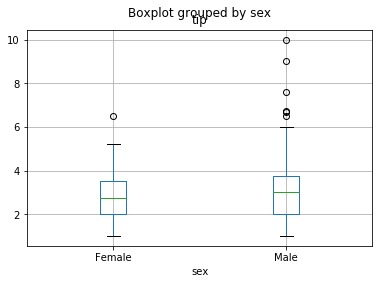

In [12]:
# Box Plot to show the Tips between Females and Males
df.boxplot(column='tip', by='sex')

### Scatter Plots

When you want to visualize 2 numeric columns, scatter plots are ideal.

In the scatter plot below, you can see that there is a positive correlation between *'total_bill'* and *'tip'* amount

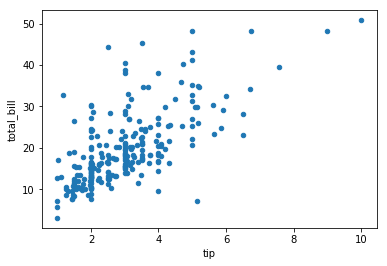

In [13]:
df.plot(kind='scatter', x='tip', y='total_bill')